这个例子让我了解一个在实际任务中如何利用数组操作。首先一个最简单的随机漫步：从0开始，步幅为1和-1，以相同的概率出现。

下面是纯python的实现方法，1000步：

In [1]:
import random
position = 0
walk = [position]
steps = 1000
for i in range(steps):
    step = 1 if random.randint(0, 1) else -1
    position += step
    walk.append(position)

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
walk[:5]

[0, -1, -2, -3, -2]

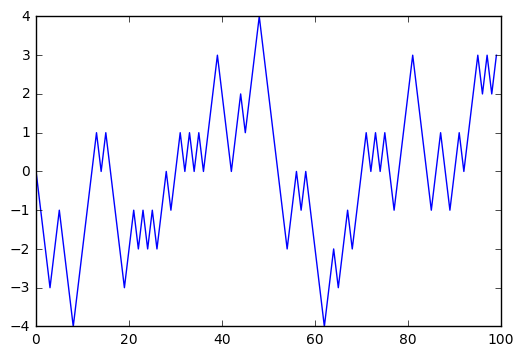

In [3]:
plt.plot(walk[:100])

随机漫步其实就是一个简单的累加。而用np.random能更快：

In [7]:
import numpy as np

In [9]:
nsteps = 1000
draws = np.random.randint(0, 2, size=nsteps)
steps = np.where(draws > 0, 1, -1)

In [10]:
walk = steps.cumsum()

我们能直接从中得到一些统计数据，比如最大值和最小值：

In [11]:
walk.min()

-57

In [12]:
walk.max()

7

一个更复杂的统计值是在哪一步random walk到达了一个指定值。我们想知道从0走出10步用了多久，不论是正方向还是负方向。`np.abs(walk) >= 10`给我们一个布尔数组告诉我们是否超过10，但我们想要第一次出现的10或-10。因此，我们利用argmax来计算，这个会返回布尔数组中最大值的索引(Ture是最大值)：

In [13]:
(np.abs(walk) >= 10).argmax()

71

注意，使用argmax并不总是效率的，因为它总会搜索整个数组。在这里例子里，一旦True被找到了，我们就返回为最大值。

# Simulating Many Random Walks at Once（一次模拟多个随机漫步）

假设我们一次要模拟5000个随机漫步。传入一个2-tuple，np.random会生成一个二维数组，然后我们沿着每行来计算累加，这样就能一次模拟5000个：

In [14]:
nwalks = 5000
nsteps = 1000
draws = np.random.randint(0, 2, size=(nwalks, nsteps)) # 0 or 1
steps = np.where(draws > 0, 1, -1)
walks = steps.cumsum(1)

In [15]:
walks

array([[ -1,  -2,  -3, ..., -24, -25, -26],
       [ -1,  -2,  -1, ..., -10,  -9,  -8],
       [  1,   0,   1, ...,  -4,  -3,  -4],
       ..., 
       [  1,   0,   1, ...,  52,  51,  52],
       [ -1,   0,   1, ..., -26, -25, -26],
       [ -1,   0,  -1, ..., -30, -29, -30]])

找到所有漫步中的最大值和最小值：

In [16]:
walks.max()

115

In [17]:
walks.min()

-129

在这些漫步模拟中，我们想找到30步以上的。用any方法：

In [18]:
hits30 = (np.abs(walks) >= 30).any(1)
hits30

array([ True, False, False, ...,  True,  True,  True], dtype=bool)

In [19]:
hits30.sum()

3423

上面的step只是像翻硬币一样二选一，我们也可以用一个概率函数来生成：

In [20]:
steps = np.random.normal(loc=0, scale=0.25, size=(nwalks, nsteps))